In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob


In [2]:
# Load dataset
reviews_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

# Preprocess the text (e.g., remove punctuation, lowercase)
reviews_df['Review'] = reviews_df['Review'].str.lower()


In [3]:
# Define a function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function to the 'Review' column
reviews_df['sentiment'] = reviews_df['Review'].apply(get_sentiment)


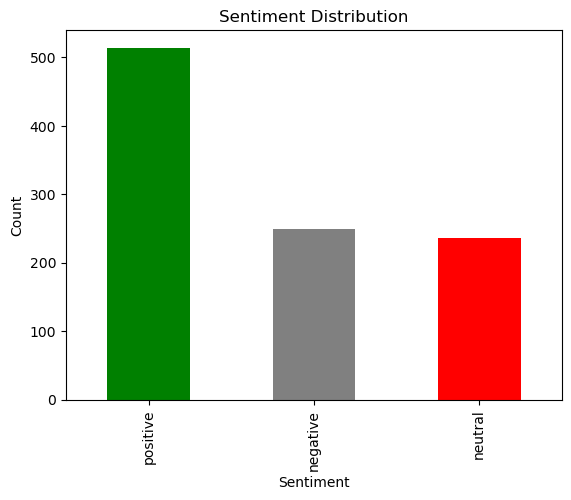

In [4]:
# Count the number of positive, neutral, and negative reviews
sentiment_counts = reviews_df['sentiment'].value_counts()

# Create a bar plot
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


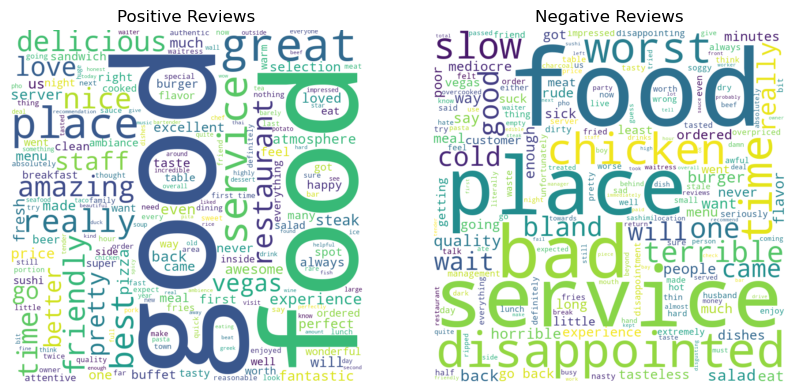

Topic 1: great, good, time, service, food, night, place, selection, just, stars
Topic 2: delicious, amazing, place, recommend, meal, fresh, did, restaurant, awesome, think
Topic 3: place, food, definitely, vegas, really, bad, best, come, good, staff
Topic 4: good, service, won, food, disappointed, friendly, worst, great, minutes, atmosphere
Topic 5: food, place, terrible, fantastic, way, probably, service, buffet, like, coming


In [5]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load restaurant review dataset
reviews_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

# Preprocess the text (e.g., remove punctuation, lowercase)
reviews_df['Review'] = reviews_df['Review'].str.lower()

# Analyze sentiment and classify as positive, neutral, or negative
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

reviews_df['Sentiment'] = reviews_df['Review'].apply(get_sentiment)

# Word Clouds for positive and negative reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'negative']['Review'])

wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

# Topic Modeling using Latent Dirichlet Allocation (LDA)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews_df['Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Get the top words for each topic
def get_top_words(model, feature_names, n_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_indices = topic.argsort()[:-n_words - 1:-1]
        top_words.append([feature_names[i] for i in top_words_indices])
    return top_words

n_words = 10  # Number of top words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()

top_words = get_top_words(lda, feature_names, n_words)

for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {', '.join(words)}")